<a href="https://colab.research.google.com/github/krishnayele/GoogleColab/blob/master/Oracle%2BData_science%2BHouse_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### It is an implementation of the steps given [here](https://www.datascience.com/blog/supervised-learning-python) 

In [0]:
#include sklearn
from sklearn.datasets import load_boston
boston = load_boston()

### Before we start to explore the data, let's turn it into a pandas data frame, which is a table-like data structure with labeled rows and columns. We'll label the columns using the 'feature_names' property of the dataset.

In [0]:
#import pandas
import pandas as pd
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)


### To know the size of the function we use shape()

In [3]:
boston_data.shape

(506, 13)

### shape function returns tuple with (rows, columns), rows will be taken here as suburbs in boston area and columns will be understood as features 
### therefor The boston has 506 suburbs and 13 features
Lets have a look at data with the help of  **head** function

In [4]:
boston_data.head

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
0     0.00632  18.0   2.31   0.0  0.538  ...   1.0  296.0     15.3  396.90   4.98
1     0.02731   0.0   7.07   0.0  0.469  ...   2.0  242.0     17.8  396.90   9.14
2     0.02729   0.0   7.07   0.0  0.469  ...   2.0  242.0     17.8  392.83   4.03
3     0.03237   0.0   2.18   0.0  0.458  ...   3.0  222.0     18.7  394.63   2.94
4     0.06905   0.0   2.18   0.0  0.458  ...   3.0  222.0     18.7  396.90   5.33
5     0.02985   0.0   2.18   0.0  0.458  ...   3.0  222.0     18.7  394.12   5.21
6     0.08829  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  395.60  12.43
7     0.14455  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  396.90  19.15
8     0.21124  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  386.63  29.93
9     0.17004  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  386.71  17.10
10    0.22489  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  

### To view small portion of data we will enter the number of counts
**head(4)**

In [5]:
boston_data.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


#### We can add a column using the following syntax

In [0]:
#the price in data set is in thousand dollars so it is converted in dollars 
boston_data["PRICE"] = boston.target*1000

### We can view basic statistic operations on data using *describe()* function

In [7]:
boston_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Training Data v Test Data
### The data will be saperated in two parts one will be used for testing the data and another will be used to train the data. The saperation should be random.

In [8]:
X = boston_data.iloc[:,:-1]
Y = boston_data["PRICE"]

#IMPORT train_test_split FROM sklearn.model_selection
from sklearn.model_selection import train_test_split

#split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 337)

print("Training data size((%i, %i) "%X_train.shape)
print("Testing data size  (%i, %i)"%X_test.shape)

Training data size((404, 13) 
Testing data size  (102, 13)


## Scaling the features
### The main motive behind scaling is make mean 0 and standard deviation. Even without scaling the dataset the final result will be same. However, the interpretation will be easier.

In [0]:
#import StandardScalar from sklearn.prepocessing
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# lets print the mean and standard deviation
print('Training set mean by feature:')
print(X_train.mean(axis=0))
print('Training set standard deviation by feature:')
print(X_train.std(axis=0))

Training set mean by feature:
[-3.07784601e-17 -3.13280754e-17  1.63785377e-16 -1.97861529e-17
 -1.92365376e-16  1.38722917e-15  3.40761522e-16  1.16518456e-16
 -9.01369188e-17  8.79384574e-18  1.33666455e-15 -5.10043053e-16
  3.84730751e-17]
Training set standard deviation by feature:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


***NOTE*** : Do not forget to add `axis=0`

## Training Our Model
Its time to build our linear regression model using the training data. This is quite simple, and just involves creating a LinearRegression model object and one call to its 'fit' method.

In [12]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
intercept = regression_model.intercept_
coef = pd.DataFrame(regression_model.coef_, index=boston.feature_names,columns=['Coefficients'])
print('Intercept=%f\n'%intercept)
print(coef)

Intercept=22467.079208

         Coefficients
CRIM      -567.973253
ZN         713.169441
INDUS       29.115757
CHAS       930.311691
NOX      -1560.068123
RM        3485.097236
AGE       -532.318954
DIS      -2730.668830
RAD       2066.840215
TAX      -1890.981867
PTRATIO  -1966.935749
B          956.319838
LSTAT    -2957.386673


## Some points to be learned HERE



*   b0, intercept term, which is equal to the mean home price among all suburbs in the training data set when all of the other coefficients are set equal to their mean values(which are all zero  in this case)
*   all the positive coefficient values signifies that the median home price increases as the corresponding feature increases. On the other hand a negative coefficient value signifies that the meadian home price decreases as the corresponding feature increases.

Let's checkout the meanings


1.  CRIM : increase in crime rate will decrease the median home price
2.   RM : An increase in the avg number of rooms per home corresponds to an increase in median home price
3.  AGE: An increase in the proportion of houses built before 1940 corresponds to a decrease in median home price
4. RAD: an increase in accessibility to radial highways corresponds to a increase in median home price

and so on





## Testing the model on new data


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

Y_pred = regression_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('Test RMSE: %f' %test_rmse)


Test RMSE: 6296.954533


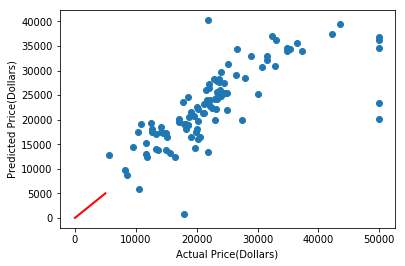

In [22]:
#plot the graph
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.plot([0,5000],[0,5000],'r',lw=2)
plt.xlabel('Actual Price(Dollars)')
plt.ylabel('Predicted Price(Dollars)')
plt.show()